# **SETUP**
**Connect to Google Drive**

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Path to .json files**

In [72]:
ap = '/content/drive/MyDrive/Python Projects/qm_project/anonymized_project.json'
ref = '/content/drive/MyDrive/Python Projects/qm_project/references.json'

**Importation**

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Initial functions**

In [74]:
def get_result_keys(df):
    """
    Get dataframe and result_keys
    :param df: input dataframe
    :return: dataframe and result_keys
    """
    ap_results = df.iloc[0][0]['results']
    result_keys = list(ap_results.keys())
    return ap_results, result_keys


def get_img_keys(df):
    """
    Get dataframe and result_keys
    :param df: input dataframe
    :return: dataframe and result_keys
    """
    ref_keys = df.keys()
    return ref_df, ref_keys


def auto_label(rects, values, ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect, item in zip(rects, values):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%0.2f' % item,
                ha='center', va='bottom')

In [75]:
sample = ap_results[img_keys[0]]['results'][0]
sample_keys = sample.keys()

sub_key_name = 'task_output'
sub_keys = sample[sub_key_name].keys()

print("Main keys:\n", sample_keys)
print("Sub keys of '{}':\n".format(sub_key_name), sub_keys)


Main keys:
 dict_keys(['task_input', 'created_at', 'workpackage_total_size', 'loss', 'project_node_input_id', 'project_node_output_id', 'task_output', 'user', 'root_input', 'project_root_node_input_id'])
Sub keys of 'task_output':
 dict_keys(['answer', 'cant_solve', 'corrupt_data', 'duration_ms'])


In [76]:
ap_df = pd.read_json(ap)
ref_df = pd.read_json(ref)

ap_results, result_keys = get_result_keys(ap_df)
ref_df, ref_keys = get_img_keys(ref_df)

# **Task 1**
Gather insights about the annotators  


**a. How many annotators did contribute to the dataset?**

In [77]:
export_csv = False

annotators = []
for result_key in result_keys:
    result_amount = len(ap_results[result_key]['results'])
    vendor_user_ids = [ap_results[result_key]['results'][i]['user']['vendor_user_id'] for i in range(result_amount)]

    # - Add data to list
    annotators.extend(vendor_user_ids)

annotators = sorted(set(annotators))
annotators_df = pd.DataFrame({'annotators': annotators})

# Export data to csv file
if export_csv:
    annotators_df.to_csv("annotators.csv")

print(annotators_df)

      annotators
0   annotator_01
1   annotator_02
2   annotator_03
3   annotator_04
4   annotator_05
5   annotator_06
6   annotator_07
7   annotator_08
8   annotator_09
9   annotator_10
10  annotator_11
11  annotator_12
12  annotator_13
13  annotator_14
14  annotator_15
15  annotator_16
16  annotator_17
17  annotator_18
18  annotator_19
19  annotator_20
20  annotator_21
21  annotator_22


**b. What are the average, min and max annotation times (durations)? Feel free to add visual representations here such as graphs if you like.**

Max duration: 42398 [ms]
Min duration: -99999 [ms]


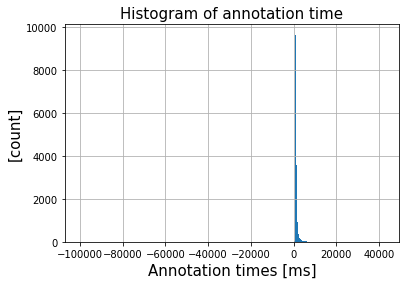

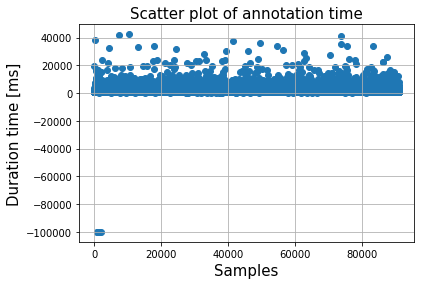

In [78]:
fs = 15

durations = []
for result_key in result_keys:
    result_amount = len(ap_results[result_key]['results'])
    duration = [ap_results[result_key]['results'][i]['task_output']['duration_ms'] for i in range(result_amount)]

    # - Add data to list
    durations.extend(duration)

min_duration = min(durations)
max_duration = max(durations)
print("Max duration: {} [ms]\nMin duration: {} [ms]".format(max_duration, min_duration))


# Histogram of annotation time
fig1, ax1 = plt.subplots()
ax1.hist(durations, bins=2000)
ax1.set_title("Histogram of annotation time", fontsize=fs)
ax1.set_xlabel("Annotation times [ms]", fontsize=fs)
ax1.set_ylabel("[count]", fontsize=fs)
ax1.grid(True)


# Scatter plot of annotation time
xs = np.arange(0, len(durations))
fig2, ax2 = plt.subplots()
ax2.scatter(xs, durations)
ax2.set_title("Scatter plot of annotation time", fontsize=fs)
ax2.set_xlabel("Samples", fontsize=fs)
ax2.set_ylabel("Duration time [ms]", fontsize=fs)
ax2.grid(True)

**c. Did all annotators produce the same amount of results, or are there differences?**

      annotators  result_count
0   annotator_01          1280
1   annotator_02          7596
2   annotator_03           630
3   annotator_04          6421
4   annotator_05          3475
5   annotator_06          5337
6   annotator_07          2175
7   annotator_08          6537
8   annotator_09          4860
9   annotator_10           315
10  annotator_11          6436
11  annotator_12          6210
12  annotator_13          7078
13  annotator_14          1725
14  annotator_15          6088
15  annotator_16          5061
16  annotator_17          3485
17  annotator_18          5170
18  annotator_19           170
19  annotator_20          6126
20  annotator_21          2950
21  annotator_22          1745


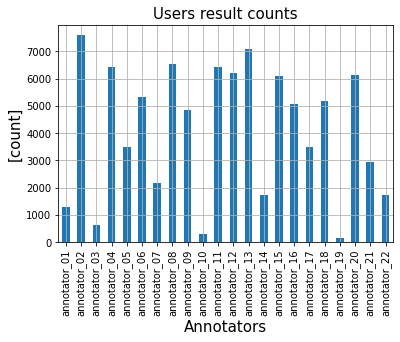

In [79]:
export_csv = False
fs = 15

# 1c: Did all annotators produce the same amount of results, or are there differences?
annotators_list = []
for result_key in result_keys:
    result_amount = len(ap_results[result_key]['results'])
    vendor_user_id = [ap_results[result_key]['results'][i]['user']['vendor_user_id'] for i in range(result_amount)]

    # - Add data to list
    annotators_list.extend(vendor_user_id)

# Count the occurrences of annotators
annotators, annotator_count = np.unique(np.array(annotators_list), return_counts=True)

# Store data in Pandas DataFrame
annotator_result_count_df = pd.DataFrame({"annotators": annotators, "result_count": annotator_count})

# Visualization
ax = annotator_result_count_df['result_count'].plot(kind='bar')
ax.set_xticklabels(annotator_result_count_df['annotators'])
ax.grid(True)
ax.set_title("Users result counts", fontsize=fs)
ax.set_xlabel("Annotators", fontsize=fs)
ax.set_ylabel("[count]", fontsize=fs)

# Export data to csv file
if export_csv:
    annotator_result_count_df.to_csv("annotator_result_count.csv")

print(annotator_result_count_df)

**d. Are there questions for which annotators highly disagree?**

In [80]:
export_csv = False

# 1d: Are there questions for which annotators highly disagree?
disagree_limit = 2
highly_disagree_questions = []

for result_key in result_keys:
    result_amount = len(ap_results[result_key]['results'])
    answers = [ap_results[result_key]['results'][i]['task_output']['answer'] for i in range(result_amount)]
    solves = [ap_results[result_key]['results'][i]['task_output']['cant_solve'] for i in range(result_amount)]
    corrupts = [ap_results[result_key]['results'][i]['task_output']['corrupt_data'] for i in range(result_amount)]

    cant_solve = solves.count(True)
    corrupt_amount = corrupts.count(True)
    ans_yes = answers.count('yes')
    ans_no = answers.count('no')

    cond = ans_yes > disagree_limit and ans_no > disagree_limit

    # - Add data to list
    if cond:
        highly_disagree_questions.append([result_key, ans_yes, ans_no, cant_solve, corrupt_amount])

highly_disagree_questions = np.array(highly_disagree_questions)
highly_disagree_questions_df = pd.DataFrame({"result_key": highly_disagree_questions[:, 0],
                                             "yes": highly_disagree_questions[:, 1],
                                             "no": highly_disagree_questions[:, 2],
                                             "cant_solve": highly_disagree_questions[:, 3],
                                             "corrupt_data": highly_disagree_questions[:, 4]})

# Export data to csv file
if export_csv:
    highly_disagree_questions_df.to_csv("highly_disagree_questions.csv")

print(highly_disagree_questions_df)

                               result_key yes no cant_solve corrupt_data
0    06fad124-9488-4ec7-b11d-8028391c8740   7  3          0            0
1    d547c179-6637-4080-b2b7-53dafd936ed0   6  4          0            0
2    09e6ec23-74d9-4176-aceb-f7096e2e9284   4  6          0            0
3    24fbda6e-d09c-44f6-92f0-c858334abe1a   6  4          0            0
4    2a89834d-362e-472d-a274-bcb7ad8da9cb   4  6          0            0
..                                    ...  .. ..        ...          ...
379  a2690dcf-8a7c-4a87-9234-b69046b1dd32   5  5          0            0
380  dfbdb4e9-fbf9-4d35-885e-45df92356ee1   7  3          0            0
381  cc46b5b5-3132-4719-8e65-801a561a297e   4  6          0            0
382  57fd88ff-e6b3-4b49-863c-e30fadc75475   5  5          0            0
383  b5c37a5f-250d-47a9-9931-795d8e3c9856   5  5          0            0

[384 rows x 5 columns]


# **Task 2**
Besides picking yes or no the annotators had the chance to tell if the data were corrupted or if they for any reason were not able to solve the task. These are fields 'cant_solve' and 'corrupt_data' given in the task_output.

**a. How often does each occur in the project and do you see a trend within the annotators that made use of these options?**

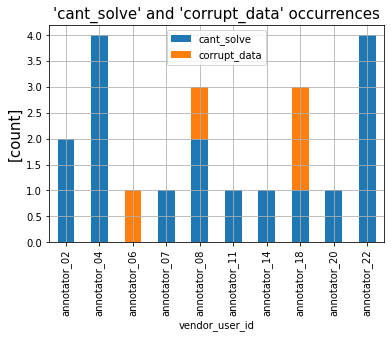

In [81]:
export_csv = False
fs = 15

# 2a: How often does each occur in the project and
# do you see a trend within the annotators that made use of these options?


def unsolved_check(result_key, index):
    """
    :param result_key: key of anonymized_project result
    :param index: index of items in result key
    :return: boolean value based on whether the answer is cant_solve or the data is corrupted
    """
    cant_solve_cond = ap_results[result_key]['results'][index]['task_output']['cant_solve']
    corrupt_data_cond = ap_results[result_key]['results'][index]['task_output']['corrupt_data']
    return cant_solve_cond or corrupt_data_cond


def get_data(result_key, index):
    """
    Get the corresponded data based on result_key and index
    :param result_key: key of anonymized_project result
    :param index: index of items in result key
    :return: a list of data
    """
    vendor_user_id = ap_results[result_key]['results'][index]['user']['vendor_user_id']
    cant_solve = ap_results[result_key]['results'][index]['task_output']['cant_solve']
    corrupt_data = ap_results[result_key]['results'][index]['task_output']['corrupt_data']
    return [vendor_user_id, int(cant_solve), int(corrupt_data)]


# Gather rows of data with users with 'cant_solve' and 'corrupt_data'
unsolved_data = []

for result_key in result_keys:
    result_amount = len(ap_results[result_key]['results'])
    unsolved = [get_data(result_key, i) for i in range(result_amount) if unsolved_check(result_key, i)]

    # - Add data to list
    unsolved_data.extend(unsolved)


# Get unique user ids
unsolved_user = sorted(set(np.array(unsolved_data)[:, 0]))


# Get the count of 'cant_solve' and 'corrupt_data' for each user and store them in a list
grouped_unsolved_data = []

for vendor_user_id in unsolved_user:
    # - Retrieve the answers of a specific user
    user_result = np.array([item for item in unsolved_data if item[0] == vendor_user_id])

    # - Count the 'cant_solve' and 'corrupt_data' occurrences
    cant_solve_count = np.sum(user_result[:, 1] == '1')
    corrupt_data_count = np.sum(user_result[:, 2] == '1')

    # - Add data to list
    grouped_unsolved_data.append([vendor_user_id, cant_solve_count, corrupt_data_count])


# Store data in Pandas dataframe
grouped_unsolved_data_df = pd.DataFrame({'vendor_user_id': np.array(grouped_unsolved_data)[:, 0],
                                         'cant_solve': np.array(grouped_unsolved_data)[:, 1],
                                         'corrupt_data': np.array(grouped_unsolved_data)[:, 2]})

# Export data to csv file
if export_csv:
    grouped_unsolved_data_df.to_csv("grouped_unsolved_data.csv")

# Visualization
display_df = grouped_unsolved_data_df[['cant_solve', 'corrupt_data']].astype(float)

ax = display_df.plot(kind='bar', stacked=True)
ax.set_xticklabels(grouped_unsolved_data_df['vendor_user_id'])
ax.set_title("'cant_solve' and 'corrupt_data' occurrences", fontsize=fs)
ax.set_xlabel("vendor_user_id")
ax.set_ylabel("[count]", fontsize=fs)
ax.grid(True)


# **Task 3**
Is the reference set balanced? Please demonstrate via numbers and visualizations.

True samples                 : 4586 in 9087 (50.47%)
False samples                : 4501 in 9087 (49.53%)
Difference between two counts: 85           (0.94%)


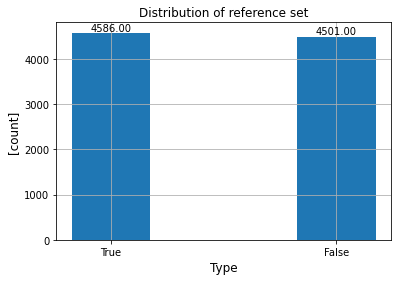

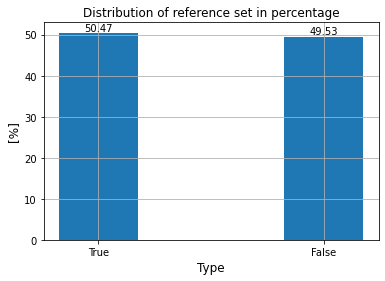

In [82]:
fs = 12


# Get data
ref_ans = [[key, ref_df[key]['is_bicycle']] for key in ref_keys]

# Get unique values and counts
answers, answer_count = np.unique(np.array(ref_ans)[:, 1], return_counts=True)


# Numerics visualization
false_count, true_count = answer_count  # Count number of true and false values
total = true_count + false_count        # Count the total values
diff = abs(true_count - false_count)    # Count the difference between two types

# - Percentage values
true_percent = round(true_count / total * 100, 2)
false_percent = round(false_count / total * 100, 2)
diff_percent = round(diff / total * 100, 2)

print("True samples                 : {} in {} ({}%)".format(true_count, total, true_percent))
print("False samples                : {} in {} ({}%)".format(false_count, total, false_percent))
print("Difference between two counts: {}           ({}%)".format(diff, diff_percent))


# Visualization
# - Display in sample counts
fig1, ax1 = plt.subplots()
rects1 = ax1.bar(["True", "False"], [true_count, false_count], width=0.35)
ax1.set_title("Distribution of reference set", fontsize=fs)
ax1.set_xlabel("Type", fontsize=fs)
ax1.set_ylabel("[count]", fontsize=fs)
ax1.grid(True)
auto_label(rects1, [true_count, false_count], ax1)

# - Display in percentage
fig2, ax2 = plt.subplots()
rects2 = ax2.bar(["True", "False"], [true_percent, false_percent], width=0.35)
ax2.set_title("Distribution of reference set in percentage", fontsize=fs)
ax2.set_xlabel("Type", fontsize=fs)
ax2.set_ylabel("[%]", fontsize=fs)
ax2.grid(True)
auto_label(rects2, [true_percent, false_percent], ax2)

# **Task 4**
Using the reference set, can you identify good and bad annotators? Please use statistics and visualizations. Feel free to get creative.

**Create data**

In [83]:
export_csv = True


# Get annotators
annotators = []
for result_key in result_keys:
    result_amount = len(ap_results[result_key]['results'])
    vendor_user_ids = [ap_results[result_key]['results'][i]['user']['vendor_user_id'] for i in range(result_amount)]
    annotators.extend(vendor_user_ids)

annotators = sorted(set(annotators))


# Get reference set
ref_ans = [[key, ref_df[key]['is_bicycle']] for key in ref_keys]


# Get annotators' answers
annotators_ans = []
for result_key in result_keys:
    result_amount = len(ap_results[result_key]['results'])

    # annotators
    vendor_user_ids = [ap_results[result_key]['results'][i]['user']['vendor_user_id'] for i in range(result_amount)]

    # annotators' answers
    answers = [ap_results[result_key]['results'][i]['task_output']['answer'] for i in range(result_amount)]

    # image name
    image_url = ap_results[result_key]['results'][0]['task_input']['image_url']
    image_name = image_url.split("/")[-1]
    image_name = image_name.split(".")[0]

    for idx, ans in zip(vendor_user_ids, answers):
        annotators_ans.append([idx, image_name, ans])


# Group the annotators' answer by annotators
annotators_packages = []
for an_id in annotators:
    temp = [[idx, im_name, ans] for idx, im_name, ans in annotators_ans if an_id == idx]
    annotators_packages.append(temp)


# Count the correct, incorrect and null answers
annotators_quality = []
for annotator_package in annotators_packages:
    # - Initialization of counters
    correct, incorrect, null = 0, 0, 0

    # - Current annotator
    annotator_id = annotator_package[0][0]

    # - Looping through each package and count the correct, incorrect and null answer
    for user_id, im_name, user_an in annotator_package:
        # -- Get row index of reference answer
        idx = [i for i, ref in enumerate(ref_ans) if im_name in ref][0]

        # -- Conditions
        correct_cond1 = user_an == 'yes' and ref_ans[idx][1]
        correct_cond2 = user_an == 'no' and not ref_ans[idx][1]
        null_cond = user_an == ""

        # -- Check condition and count
        if correct_cond1 or correct_cond2:
            correct += 1
        elif null_cond:
            null += 1
        else:
            incorrect += 1

    total = correct + incorrect + null

    # - Add data to list
    annotators_quality.append([annotator_id.split("_")[1], correct, incorrect, null, total])
    print(annotator_id.split("_")[1], correct, incorrect, null, total)
    break


# Store data in Pandas dataframe
annotators_quality = np.array(annotators_quality)
label = annotators_quality[:, 0]
correct = [int(item) for item in annotators_quality[:, 1]]
incorrect = [int(item) for item in annotators_quality[:, 2]]
null = [int(item) for item in annotators_quality[:, 3]]
total = [int(item) for item in annotators_quality[:, 4]]

annotators_quality_df = pd.DataFrame({'id': label,
                                      'correct': correct,
                                      'incorrect': incorrect,
                                      'null': null,
                                      'total': total})

# Export data to csv file
if export_csv:
    annotators_quality_df.to_csv("annotators_quality_assessment.csv", index=False)


print(annotators_quality_df)

01 1214 66 0 1280
   id  correct  incorrect  null  total
0  01     1214         66     0   1280


**Visualization**

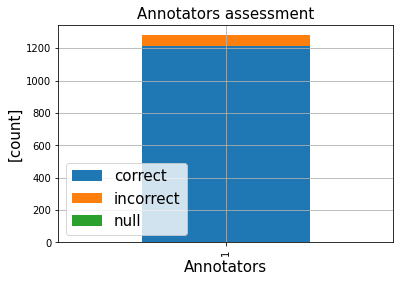

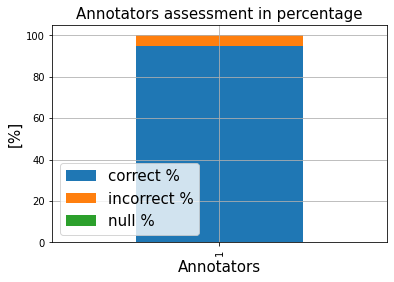

In [84]:
width = 0.8
fs = 15


def percent_cal(item):
    """
    Function for calculating the percentage values
    :param item:
    :return: percentage values
    """
    idx, correct, incorrect, null, total = item
    correct_percent = round(correct / total * 100, 2)
    incorrect_percent = round(incorrect / total * 100, 2)
    null_percent = round(null / total * 100, 2)

    return [idx, correct_percent, incorrect_percent, null_percent]


# Load data
annotators_quality_df = pd.read_csv("annotators_quality_assessment.csv")
annotators_quality = annotators_quality_df.values.tolist()


# Amount display
labels = annotators_quality_df['id']
display_df = annotators_quality_df[['correct', 'incorrect', 'null']]
ax1 = display_df.plot(kind='bar', stacked=True, use_index=False)
ax1.set_xticklabels(labels)
ax1.grid(True)
ax1.set_title("Annotators assessment", fontsize=fs)
ax1.set_xlabel("Annotators", fontsize=fs)
ax1.set_ylabel("[count]", fontsize=fs)
ax1.legend(prop={'size': fs})


# Percentage display
percent_data = np.array([percent_cal(item) for item in annotators_quality])
correct_p = [item for item in percent_data[:, 1]]
incorrect_p = [item for item in percent_data[:, 2]]
null_p = [item for item in percent_data[:, 3]]

df = pd.DataFrame({'correct %': correct_p, 'incorrect %': incorrect_p, 'null %': null_p})
ax2 = df.plot(kind='bar', stacked=True, use_index=False)
ax2.set_xticklabels(labels)
ax2.grid(True)
ax2.set_title("Annotators assessment in percentage", fontsize=fs)
ax2.set_xlabel("Annotators", fontsize=fs)
ax2.set_ylabel("[%]", fontsize=fs)
ax2.legend(prop={'size': fs})